# Colombian Coffee Production Prediction

## Weather Analysis

This sript will retrieve information from the .csv file saved on step 0 ([Loading Data](00_LoadingData.ipynb)) and perform a partial analysis using only weather and time related variables.

If step 0 ([Loading Data](00_LoadingData.ipynb)) has already been executed **once** it will not be necessary to execute it again.  For analysis purposes, it's also assumed tht step 1 ([EDA](01_EDA.ipynb)) has also been executed for a better understanding

In [20]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import model_selection

**Load Cleaned Data**

In [21]:
pd.set_option('display.max_rows',50)
coffee_df=pd.read_csv('../csv/FINAL_coffee_mth.csv', index_col=0)
len(coffee_df)

98

### First Analysis (Weather *without* month information) 

In [4]:
coffee_df.columns

Index(['Produccion', 'year', 'month', 'avg_precip', 'avg_tmp', 'avg_wind',
       'dew_point', 'avg_humidity', 'colombia_price', 'brasil_price',
       'others_price', 'vol_export', 'trm', 'Intercept', 'month[T.January]',
       'month[T.February]', 'month[T.March]', 'month[T.May]', 'month[T.June]',
       'month[T.July]', 'month[T.August]', 'month[T.September]',
       'month[T.October]', 'month[T.November]', 'month[T.December]'],
      dtype='object')

**Separate Dependent (Produccion) from Independent Variables (Only Weather)**

In [6]:
#Separate Dependent (Produccion) from Independent Variables (Only Weather) - Include Intercept!
y = coffee_df['Produccion']
x = coffee_df[['avg_precip', 'avg_tmp', 'avg_wind',
       'dew_point', 'avg_humidity','Intercept']]
x.head()

,avg_precip,avg_tmp,avg_wind,dew_point,avg_humidity,Intercept
0,0.0,73,1,64,69.625000,1.0
1,0.0,76,1,64,70.153846,1.0
2,0.0,75,1,65,68.500000,1.0
3,0.0,73,1,66,78.375000,1.0
4,0.0,74,1,66,76.703704,1.0


**Split data into train (70%) and test (30%) sets, generate a first model**

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3)

model = sm.OLS(y_train, X_train)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Produccion   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     2.166
Date:                Sun, 29 Apr 2018   Prob (F-statistic):             0.0693
Time:                        12:57:10   Log-Likelihood:                -470.95
No. Observations:                  68   AIC:                             953.9
Df Residuals:                      62   BIC:                             967.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
avg_precip     862.3188    559.620      1.541      0.128    -256.345    1980.983
avg_tmp        -35.7624     52.471     -0.682      0.498    -140.651      69.126
avg_wind       112.2885     54.855      2.047      0.045       2.634     221.943
dew_point       52.1720     63.235      0.825      0.413     -74.232     178.576
avg_humidity   -12.1280     17.816     -0.681      0.499     -47.741      23.485
Intercept      859.7245   3086.128      0.279      0.781   -5309.357    7028.805
==============================================================================
Omnibus:                        0.593   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.744   Jarque-Bera (JB):                0.713
Skew:                           0.194   Prob(JB):                        0.700
Kurtosis:                       2.681   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Analysis:**
* R2 is very low (0.149), as well as Adj-R2 (0.08)
* P Values don't look very good [0.045, 0,781]
* Only variable that seems significant is **avg_wind**
* Skew is close to 0 (0.194)
* Kurtosis is low as well (2.68 < 7)

**Residual Plot**

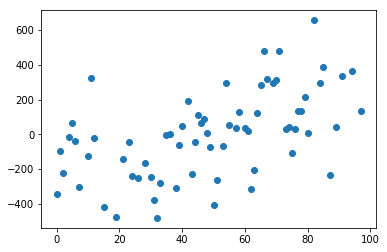

In [12]:
fit.resid.plot(style='o', figsize=(6,4))

In [10]:
lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.1486881837055748

Same R2 value, model is accurate, although not very predictive.

**Test Score**

In [13]:
lr.score(X_test, y_test)

0.16766919392486102

**Conclusion**

Using only weather data, model is not very predictive.

It seems as the only significant vaiables are Wind Speed, followed by Avg Precipitations by month.  Other weather information don't seem to influence on coffe Production

Maybe the weather incluences only during the hasvest month:

### Second Analysis (Weather *WITH* month information) 

**Separate Independent Variables (Weather AND Harvest Month)**

In [14]:
x = coffee_df[['avg_precip', 'avg_tmp', 'avg_wind',
       'dew_point', 'avg_humidity', 'month[T.August]',
       'month[T.December]', 'month[T.February]', 'month[T.January]',
       'month[T.July]', 'month[T.June]', 'month[T.March]', 'month[T.May]',
       'month[T.November]', 'month[T.October]', 'month[T.September]', 'Intercept']]
x.head()

,avg_precip,avg_tmp,avg_wind,dew_point,avg_humidity,month[T.August],month[T.December],month[T.February],month[T.January],month[T.July],month[T.June],month[T.March],month[T.May],month[T.November],month[T.October],month[T.September],Intercept
0,0.0,73,1,64,69.625000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,76,1,64,70.153846,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,75,1,65,68.500000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,73,1,66,78.375000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,74,1,66,76.703704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


**Split data into train (70%) and test (30%) sets, generate a model**

In [16]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3)

model = sm.OLS(y_train, X_train)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Produccion   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     3.255
Date:                Sun, 29 Apr 2018   Prob (F-statistic):           0.000682
Time:                        13:12:23   Log-Likelihood:                -458.57
No. Observations:                  68   AIC:                             951.1
Df Residuals:                      51   BIC:                             988.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
avg_precip          1338.7589    550.696      2.431      0.019     233.190    2444.327
avg_tmp              -38.1641     53.153     -0.718      0.476    -144.873      68.545
avg_wind             114.3527     55.903      2.046      0.046       2.123     226.583
dew_point            147.8855     65.828      2.247      0.029      15.729     280.042
avg_humidity         -21.2452     19.217     -1.106      0.274     -59.825      17.335
month[T.August]      313.2312    155.334      2.017      0.049       1.386     625.077
month[T.December]    641.7043    145.625      4.407      0.000     349.349     934.059
month[T.February]    232.2729    135.291      1.717      0.092     -39.336     503.882
month[T.January]     308.6742    170.989      1.805      0.077     -34.600     651.949
month[T.July]        450.3257    151.367      2.975      0.004     146.443     754.208
month[T.June]        163.9048    179.219      0.915      0.365    -195.892     523.701
month[T.March]        83.3176    142.127      0.586      0.560    -202.014     368.649
month[T.May]         213.2967    138.161      1.544      0.129     -64.072     490.666
month[T.November]    501.4924    138.931      3.610      0.001     222.577     780.407
month[T.October]     327.5778    148.400      2.207      0.032      29.652     625.504
month[T.September]   236.2514    163.902      1.441      0.156     -92.795     565.298
Intercept          -4857.4072   3568.145     -1.361      0.179    -1.2e+04    2305.943
==============================================================================
Omnibus:                        0.067   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.967   Jarque-Bera (JB):                0.090
Skew:                          -0.062   Prob(JB):                        0.956
Kurtosis:                       2.873   Cond. No.                     1.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Analysis:**
* R2 improves (0.505), as well as Adj-R2 (0.35)
* P Values also imrpove on **weather variables** but they still don't look very good [0.029, 0,476]
* Significant **weather variables** now seem to be **avg_wind, avg_precip and dew_point**
* Skew is now negative, but close to 0 (-0.062)
* Kurtosis is low as well (2.87 < 7)

**Residual Plot**

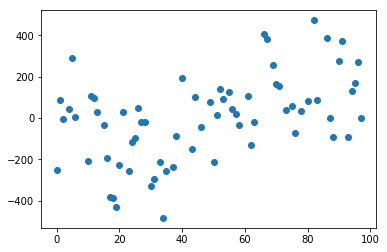

In [17]:
fit.resid.plot(style='o', figsize=(6,4))

In [18]:
lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.5052118856048835

Same R2 value, model is accurate, although still not very predictive.

**Test Score**

In [19]:
lr.score(X_test, y_test)

-0.09713302089128771

**Conclusion**

Month of harvest seem to be an important feature on Coffee Production, it affects, not only the result, but the weather variables as well.  Both combined, they improve the model. Seems like weather affects the month of hasrvesting not not very much on other stages of coffeee life cycle.

However, model is now Overfit.  Although we got a better R2 value for the training set, test score is now negative, wich might indicate that the model is fitting itself only to the training data.  Other external variables mihgt need to be analyzed.